In [36]:
#csv reading
import csv

salaryFile = open('salary_farms2.csv')

type(salaryFile)

csvreader=csv.reader(salaryFile)

In [35]:
header = []
header = next(csvreader)
header

['farm;date;day_start;day_end;lunch_break;hours_done;hourly_rate']

In [16]:
rows = []
for row in csvreader:
    rows.append(row)
    
rows

salaryFile.close()

[['wayne_thomas;18/02/2023;6:00;16:00;1:00;9:00;26.7'],
 ['wayne_thomas;20/02/2023;6:00;15:30;1:00;8:30;26.7'],
 ['wayne_thomas;21/02/2023;6:00;16:30;1:00;9:30;26.7'],
 ['wayne_thomas;22/02/0203;6:00;15:30;1:00;8:30;26.7'],
 ['wayne_thomas;23/02/2023;6:00;15:00;1:00;8:00;26.7'],
 ['wayne_thomas;24/02/2023;6:30;14:00;1:00;6:30;26.7']]

import csv
rows = []
with open("salary_farms2.csv", r) as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(header)
print(rows)

In [37]:
import csv
rows = []
with open("salary_farms2.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(header)
print(rows)

['farm;date;day_start;day_end;lunch_break;hours_done;hourly_rate']
[['wayne_thomas;18/02/2023;6:00;16:00;1:00;9:00;26.7'], ['wayne_thomas;20/02/2023;6:00;15:30;1:00;8:30;26.7'], ['wayne_thomas;21/02/2023;6:00;16:30;1:00;9:30;26.7'], ['wayne_thomas;22/02/0203;6:00;15:30;1:00;8:30;26.7'], ['wayne_thomas;23/02/2023;6:00;15:00;1:00;8:00;26.7'], ['wayne_thomas;24/02/2023;6:30;14:00;1:00;6:30;26.7']]


In [38]:
import pandas as pd
data = pd.read_csv("salary_farms2.csv")
data

,farm;date;day_start;day_end;lunch_break;hours_done;hourly_rate
0,wayne_thomas;18/02/2023;6:00;16:00;1:00;9:00;26.7
1,wayne_thomas;20/02/2023;6:00;15:30;1:00;8:30;26.7
2,wayne_thomas;21/02/2023;6:00;16:30;1:00;9:30;26.7
3,wayne_thomas;22/02/0203;6:00;15:30;1:00;8:30;26.7
4,wayne_thomas;23/02/2023;6:00;15:00;1:00;8:00;26.7
5,wayne_thomas;24/02/2023;6:30;14:00;1:00;6:30;26.7


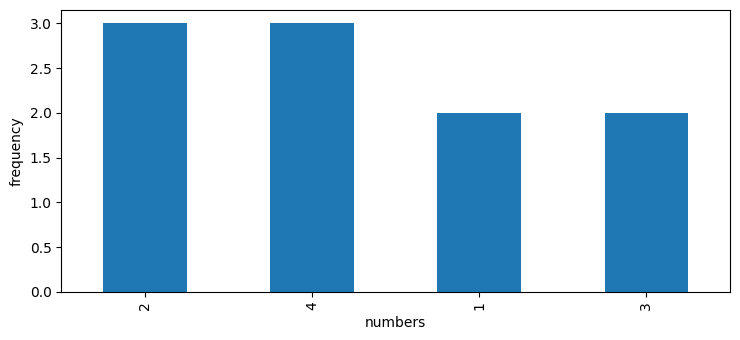

In [45]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
df['numbers'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

#headers = ['Farm', 'Date', 'day_start', 'day_end', 'day_end', 'lunch_break', 'smoko', 'hours_done', 'hourly_rate']
# importing the module
import pandas as pd

# read specific columns of csv file using Pandas
df = pd.read_csv("salary_data.csv", usecols = ['farm','date','hours_done'])
print(df)


            farm        date hours_done
0   wayne_thomas  18/02/2023       8:45
1   wayne_thomas  20/02/2023       8:15
2   wayne_thomas  21/02/2023       9:15
3   wayne_thomas  22/02/0203       8:15
4   wayne_thomas  23/02/2023       7:45
..           ...         ...        ...
94           NaN         NaN       0:00
95           NaN         NaN       0:00
96           NaN         NaN       0:00
97           NaN         NaN       0:00
98           NaN         NaN       0:00

[99 rows x 3 columns]
